<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_SemiSupervised_LabelPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/

In [9]:
# Import required libraries
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation
import matplotlib.pyplot as plt

In [2]:
# Define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
# summarize training set size
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Train Set:', X_test_unlab.shape, y_test_unlab.shape)
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

Labeled Train Set: (250, 2) (250,)
Unlabeled Train Set: (250, 2) (250,)
Test Set: (500, 2) (500,)


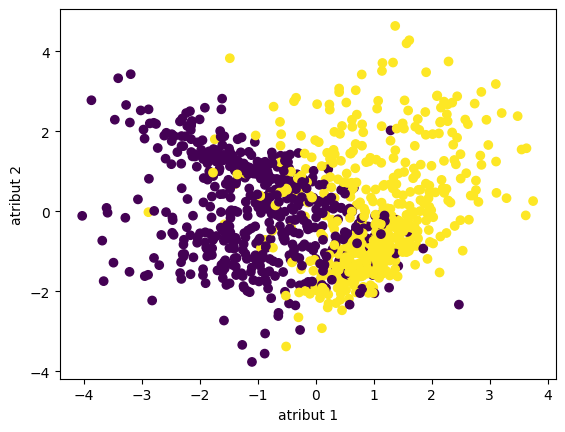

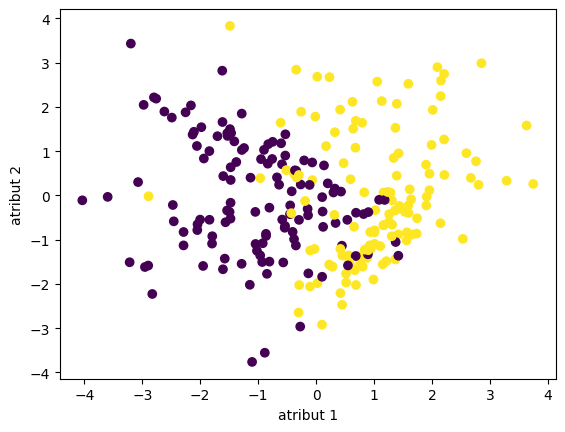

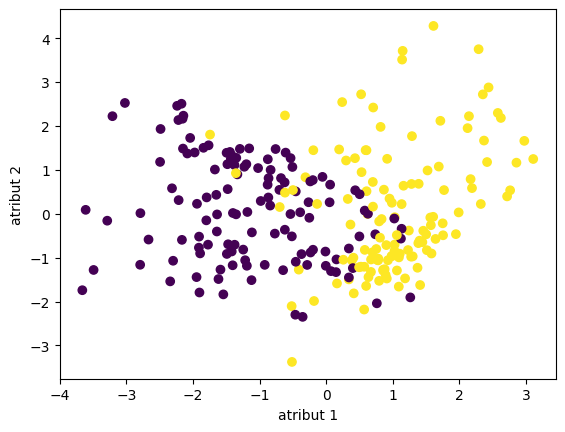

In [20]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.xlabel('atribut 1')
plt.ylabel('atribut 2')
plt.show()

plt.scatter(x=X_train_lab[:,0], y=X_train_lab[:,1], c=y_train_lab)
plt.xlabel('atribut 1')
plt.ylabel('atribut 2')
plt.show()

plt.scatter(x=X_test_unlab[:,0], y=X_test_unlab[:,1], c=y_test_unlab)
plt.xlabel('atribut 1')
plt.ylabel('atribut 2')
plt.show()

In [3]:
# Ordinary Logistic Regression Model

# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))
# confusion matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

Accuracy: 84.800
[[207  42]
 [ 34 217]]


In [34]:
# Label Propagation

# Prepare the data
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

print(y_train_mixed)
print(model.transduction_)

[ 0  0  1  1  0  1  1  0  0  1  1  1  0  0  0  1  0  0  0  0  0  0  0  0
  0  1  0  1  1  1  0  1  0  1  0  1  0  0  1  1  1  1  1  0  0  0  0  1
  1  0  1  1  1  1  1  1  0  1  0  1  0  0  1  0  0  0  0  1  1  0  1  0
  1  1  0  1  1  0  1  0  1  0  0  0  1  1  0  1  0  1  1  1  0  0  0  1
  1  1  0  0  1  1  1  1  0  0  1  1  0  1  0  1  1  1  1  1  0  1  0  0
  1  0  1  0  0  0  0  0  0  0  0  1  1  1  0  0  1  1  0  0  1  1  0  0
  0  0  1  0  1  0  0  0  0  0  1  1  0  1  1  0  0  0  1  1  0  1  1  1
  0  1  0  1  0  1  1  0  0  1  1  0  1  0  1  0  1  1  1  1  1  1  0  0
  0  1  1  0  0  1  1  1  1  1  0  0  1  0  0  1  0  1  0  1  1  0  1  1
  0  1  1  0  0  1  0  1  1  0  1  1  0  1  1  1  0  0  0  1  0  0  1  1
  0  0  0  0  0  0  1  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

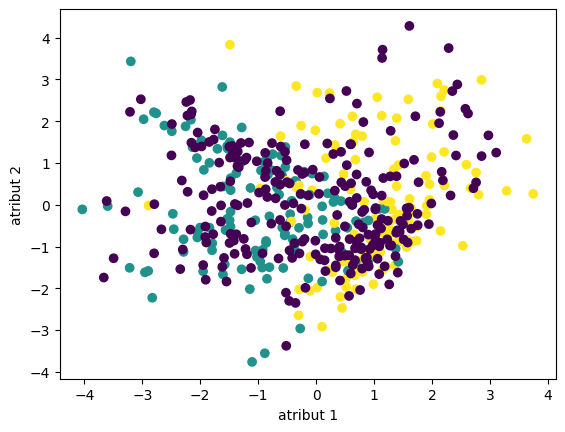

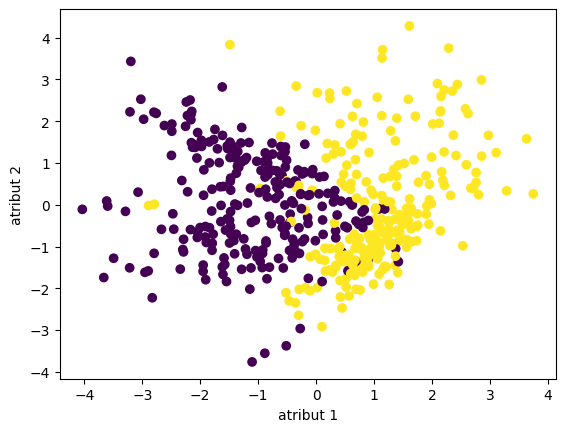

In [32]:
plt.scatter(x=X_train_mixed[:,0], y=X_train_mixed[:,1], c=y_train_mixed)
plt.xlabel('atribut 1')
plt.ylabel('atribut 2')
plt.show()

plt.scatter(x=X_train_mixed[:,0], y=X_train_mixed[:,1], c=model.transduction_)
plt.xlabel('atribut 1')
plt.ylabel('atribut 2')
plt.show()

In [33]:
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))
# confusion matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

Accuracy: 85.600
[[212  37]
 [ 35 216]]
